# Number Plate Recognition

In [1]:
# necessary libraries 
import cv2 as cv
import matplotlib.pyplot as plt
import pytesseract
import pandas as pd
import numpy as np
import os
from thefuzz import fuzz

pytesseract.pytesseract.tesseract_cmd="C://Program Files//Tesseract-OCR//tesseract.exe"
cascade = cv.CascadeClassifier('./haarcascade_russian_plate_number.xml')

g:\All Docs\Sayan\Desktop\number-plate-recognition\npenv\Lib\site-packages\thefuzz\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
# image files
img_dir = "./dataset/"
img_list = os.listdir(img_dir)

Text(0.5, 1.0, 'Sample Image')

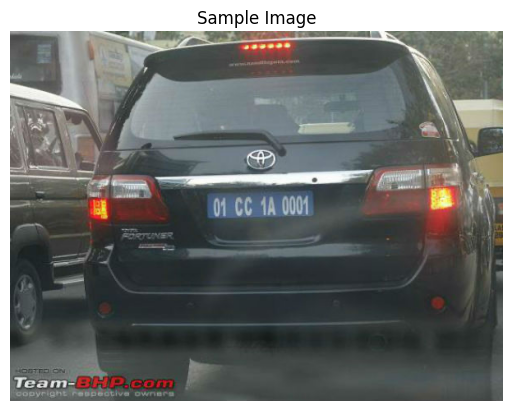

In [3]:
# reading and showing the image
img = cv.imread(f"{img_dir}{img_list[0]}", cv.IMREAD_UNCHANGED)
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Sample Image")

Text(0.5, 1.0, 'Extracted Number Plate')

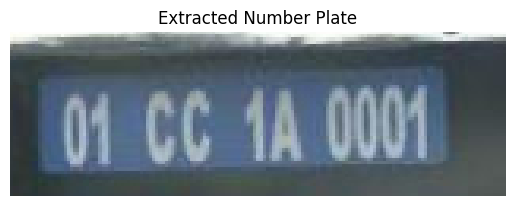

In [4]:
# extracting the portion of the image that contains the number plate
plate_area = cascade.detectMultiScale(gray, 1.1, 4)
for (x, y, w, h) in plate_area:
    plate_img = img[y:y+h, x:x+w]

plt.imshow(cv.cvtColor(plate_img, cv.COLOR_BGR2RGB))
plt.axis("off")
plt.title("Extracted Number Plate")

Text(0.5, 1.0, 'Extracted Number Plate')

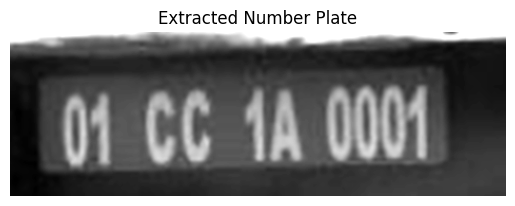

In [10]:
# changing to grayscale
plate_img_gray = cv.cvtColor(plate_img, cv.COLOR_BGR2GRAY)

# resizing 
plate_resized = cv.resize(plate_img_gray, None, fx=3, fy=3, interpolation=cv.INTER_CUBIC)

# gaussian blur
gaussian_blur = cv.GaussianBlur(plate_resized, (5, 5), 0)

# increasing contrast 
contrast_scaler = 1.2*np.ones(gaussian_blur.shape)
contrasted = np.uint8(np.clip(cv.multiply(np.float64(gaussian_blur), contrast_scaler), 0, 255))

# plt.imshow(cv.cvtColor(sharpened, cv.COLOR_BGR2RGB))
plt.imshow(contrasted, cmap="gray")
plt.axis("off")
plt.title("Extracted Number Plate")

In [ ]:
# reacding the number plate
text = pytesseract.image_to_string(contrasted, lang="eng", 
                            config="--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRTSTUVWXYZ1234567890")
print(text)

01CC1A0001



In [11]:
def plate_reader(path):
    img = cv.imread(path)
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    plate_area = cascade.detectMultiScale(gray, 1.1, 4)
    if len(plate_area) > 0: 
        for (x, y, w, h) in plate_area:
            plate_img = img[y:y+h, x:x+w]

        # changing to grayscale
        plate_img_gray = cv.cvtColor(plate_img, cv.COLOR_BGR2GRAY)

        # resizing 
        plate_resized = cv.resize(plate_img_gray, None, fx=3, fy=3, interpolation=cv.INTER_CUBIC)

        # gaussian blur
        gaussian_blur = cv.GaussianBlur(plate_resized, (5, 5), 0)

        # increasing contrast 
        contrast_scaler = 1.2*np.ones(gaussian_blur.shape)
        contrasted = np.uint8(np.clip(cv.multiply(np.float64(gaussian_blur), contrast_scaler), 0, 255))

        text = pytesseract.image_to_string(contrasted, lang="eng", 
                            config="--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRTSTUVWXYZ1234567890")
        return text
    else:
        return ''
    
print(plate_reader(f'{img_dir}{img_list[0]}'))

01CC1A0001



In [7]:
# reading the plate numbers of the available number plates 
true_plate_number = []
pred_plate_number = []
for img_filename in img_list:
    img_full_path = img_dir+img_filename
    true_plate_number.append(img_filename.split(".")[0])
    pred_plate_number.append(plate_reader(img_full_path).replace("\n", ""))

In [8]:
df = pd.DataFrame(zip(true_plate_number, pred_plate_number), columns=["True_Value", "Predicted_Value"])
df["match%"] = df.apply(lambda x: fuzz.ratio(x["True_Value"], x["Predicted_Value"]), axis=1)
df

,True_Value,Predicted_Value,match%
0,01CC1A0001,01CC1A0001,100
1,15LK10898,15LK10898,100
2,B2228HM,B2228HM,100
3,BAD231,BAD231,100
4,BATMAN,,0
5,BRIT0001,BRIT0001,100
6,BSMART2,,0
7,CH01AN0001,CHO1AN0001,90
8,CHIOOSE,,0
9,CRAIG,CRAIG,100


In [9]:
round(df["match%"].mean(), 2)

73.13